In [1]:
%matplotlib notebook
# encoding=utf8  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import scipy.interpolate
import scipy.optimize
import sys
import re
from scipy.interpolate import griddata 
import glob
import collections
import numpy.ma as ma

In [2]:
color_list = np.array([(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)])/255.0

cmap = matplotlib.cm.get_cmap('viridis')
rmap = matplotlib.cm.get_cmap('bwr')

<IPython.core.display.Javascript object>


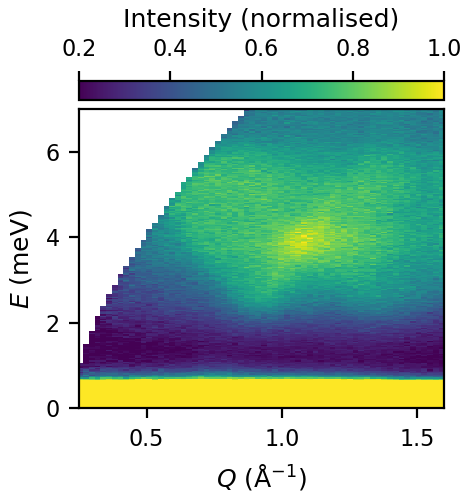

In [4]:
data = np.genfromtxt('CrPymCl2_Ei_12p14meV_1p7K_full_dataset.mat',skip_header=2)

E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
Q_min=0.09802
Q_max=4.67675
dQ=0.02112
Qs = np.arange(Q_min,Q_max,dQ)#((Q_max - Q_min)/dQ)

E_min=-1.214
E_max=9.712
dE=0.03035
Es = np.arange(E_min,E_max,dE)#((E_max - E_min)/dE)

QGrid, EGrid = np.meshgrid(Q_g, E_g)

IGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(IGrid), 0, IGrid)
mask = np.where(np.isnan(mask), 1, mask)
IGrid = ma.masked_array(IGrid, mask=mask)
IGrid = IGrid/580

fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,IGrid,cmap=cmap,shading='auto',vmin=0.2,vmax=1) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.02)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity (normalised)',fontsize=9)
plt.xlim(0.25,1.6)
plt.ylim(0,7)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_1p7K_12p14meV.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


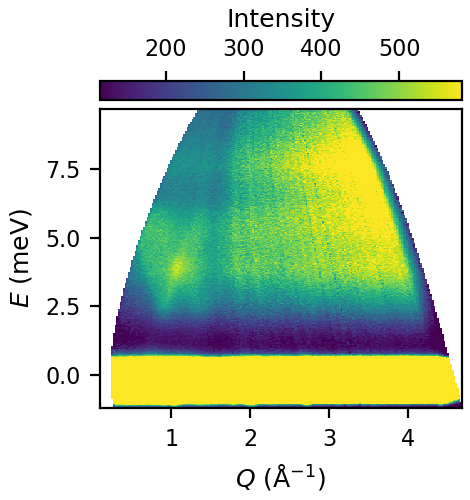

In [5]:
data = np.genfromtxt('CrPymCl2_Ei_12p14meV_1p7K_full_dataset.mat',skip_header=2)

E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
Q_min=0.09802
Q_max=4.67675
dQ=0.02112
Qs = np.arange(Q_min,Q_max,dQ)

E_min=-1.214
E_max=9.712
dE=0.03035
Es = np.arange(E_min,E_max,dE)

QGrid, EGrid = np.meshgrid(Q_g, E_g)

IGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(IGrid), 0, IGrid)
mask = np.where(np.isnan(mask), 1, mask)
IGrid = ma.masked_array(IGrid, mask=mask)

fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,IGrid,cmap=cmap,shading='auto',vmin=116,vmax=580) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.02)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity',fontsize=9)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks([1,2,3,4],fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_1p7K_12p14meV_full_dataset.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


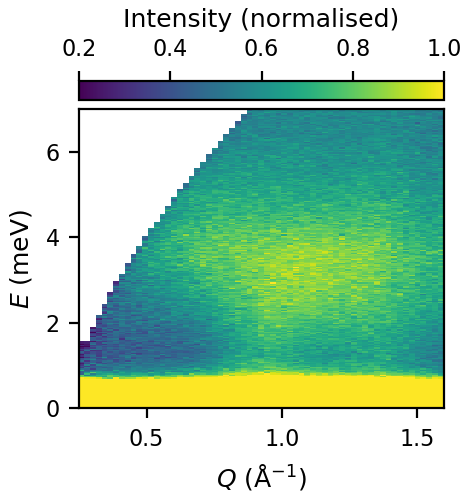

In [3]:
data = np.genfromtxt('CrPymCl2_Ei_12.14meV_25K_zoom.mat',skip_header=2)
E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
QGrid, EGrid = np.meshgrid(Q_g, E_g)
dIGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(dIGrid), 0, dIGrid)
mask = np.where(np.isnan(mask), 1, mask)
dIGrid = ma.masked_array(dIGrid, mask=mask)
datmax=np.amax(ma.masked_array(dIGrid, mask=np.less(EGrid,2)))
HTIGrid = dIGrid
dIGrid = dIGrid/datmax

fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,dIGrid,cmap=cmap,shading='auto',vmin=0.2,vmax=1) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.02)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity (normalised)',fontsize=9)
plt.xlim(0.25,1.6)
plt.ylim(0,7)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_25K_12p14meV_zoom.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


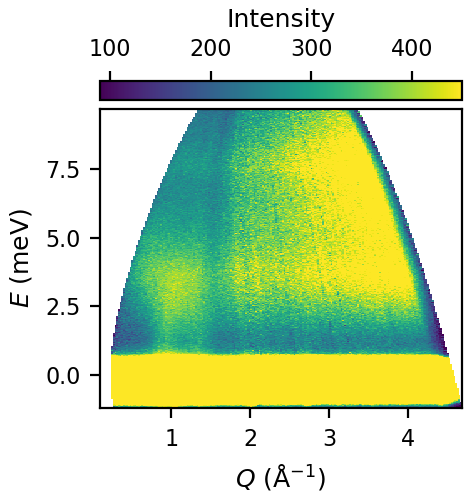

In [6]:
data = np.genfromtxt('CrPymCl2_Ei_12.14meV_25K_full_dataset.mat',skip_header=2)
E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
QGrid, EGrid = np.meshgrid(Q_g, E_g)
dIGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(dIGrid), 0, dIGrid)
mask = np.where(np.isnan(mask), 1, mask)
dIGrid = ma.masked_array(dIGrid, mask=mask)
datmax=np.amax(ma.masked_array(dIGrid, mask=np.logical_or(EGrid<2,QGrid>1.5)))
HTIGrid = dIGrid

fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,dIGrid,cmap=cmap,shading='auto',vmin=datmax/5,vmax=datmax) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.02)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity',fontsize=9)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks([1,2,3,4],fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_25K_12p14meV_full_dataset.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


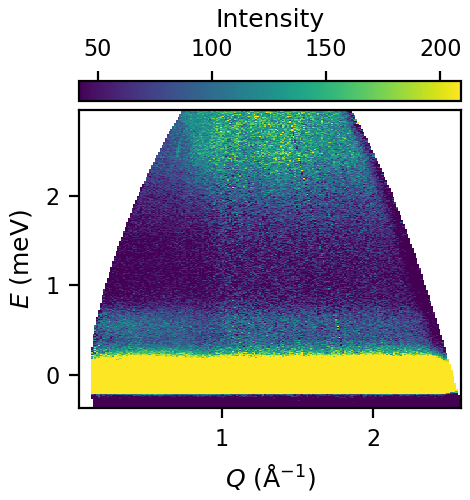

In [7]:
data = np.genfromtxt('CrPymCl2_Ei_3p70meV_1p7K_full_dataset.mat',skip_header=2)
E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
QGrid, EGrid = np.meshgrid(Q_g, E_g)
dIGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(dIGrid), 0, dIGrid)
mask = np.where(np.isnan(mask), 1, mask)
dIGrid = ma.masked_array(dIGrid, mask=mask)
datmax=np.amax(ma.masked_array(dIGrid, mask=np.logical_or(EGrid<1,QGrid>1)))

fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,dIGrid,cmap=cmap,shading='auto',vmin=datmax/5,vmax=datmax) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.02)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity',fontsize=9)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_1p7K_3p70meV_full_dataset.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


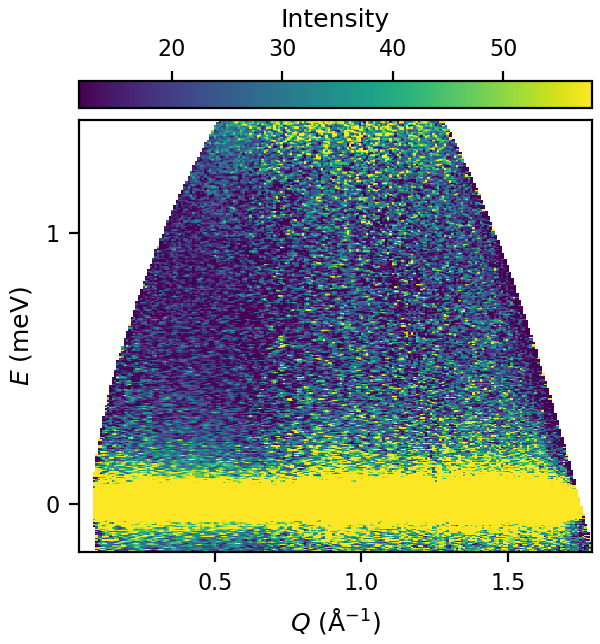

In [8]:
data = np.genfromtxt('CrPymCl2_Ei_1p77meV_25K_full_dataset.mat',skip_header=2)
E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
QGrid, EGrid = np.meshgrid(Q_g, E_g)
dIGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(dIGrid), 0, dIGrid)
mask = np.where(np.isnan(mask), 1, mask)
dIGrid = ma.masked_array(dIGrid, mask=mask)
datmax=np.amax(ma.masked_array(dIGrid, mask=np.logical_or(EGrid<1,QGrid>1)))
datmax=58

fig, ax2 = plt.subplots(figsize=(3, 3.22),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,dIGrid,cmap=cmap,shading='auto',vmin=datmax/5,vmax=datmax) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.01)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity',fontsize=9)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks([0,1],fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_25K_1p77meV_full_dataset.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


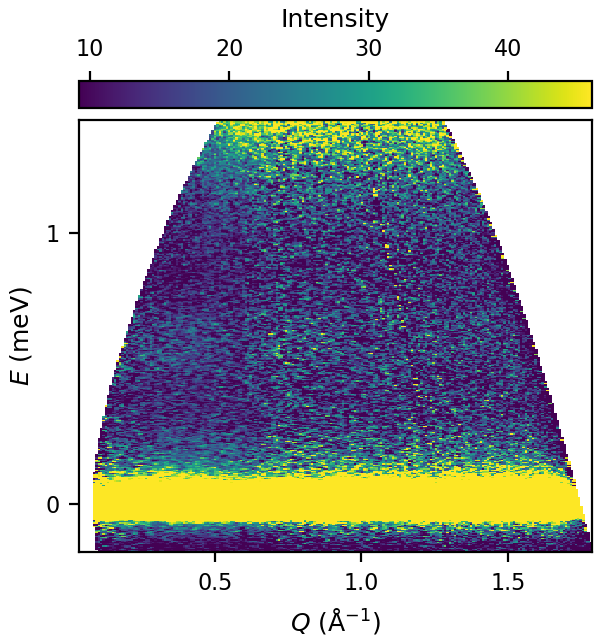

In [9]:
data = np.genfromtxt('CrPymCl2_Ei_1p77meV_1p7K_full_dataset.mat',skip_header=2)
E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
QGrid, EGrid = np.meshgrid(Q_g, E_g)
dIGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(dIGrid), 0, dIGrid)
mask = np.where(np.isnan(mask), 1, mask)
dIGrid = ma.masked_array(dIGrid, mask=mask)
datmax=np.amax(ma.masked_array(dIGrid, mask=np.logical_or(EGrid<1,QGrid>1)))
datmax=46

fig, ax2 = plt.subplots(figsize=(3, 3.22),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,dIGrid,cmap=cmap,shading='auto',vmin=datmax/5,vmax=datmax) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.01)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity',fontsize=9)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks([0,1],fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.savefig('CrpymCl2_heatmap_LET_1p7K_1p77meV_full_dataset.pdf', transparent=True)
plt.show()

579.6239422
(198, 64)
[0.71535747 0.0052879  0.06259252 0.18555429]
(12672,) (12672,) (12672,)
max 0.1802563391994334 min -0.3285330170125821 nan 7288 -4.998516404467138e-10 0.05801780085128155
0.3069562166888696 0.026690834209760667


<IPython.core.display.Javascript object>


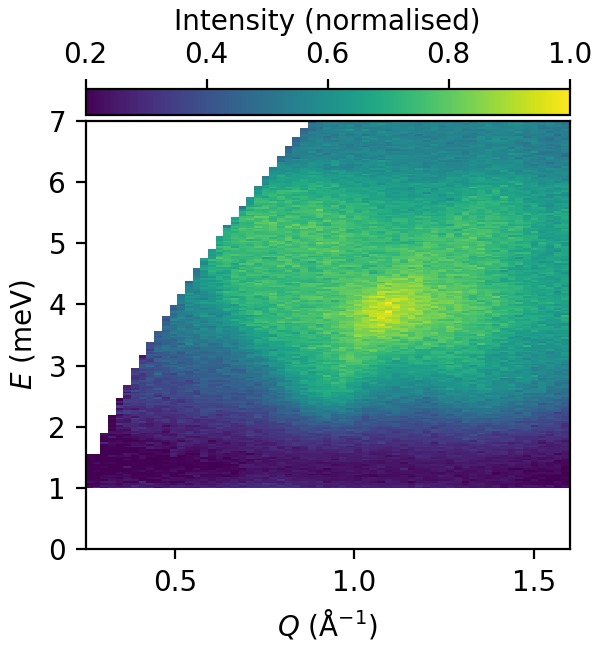

In [17]:
#data fitting
def fit_dat(xy,a,m,n,c):
    [x,y,cal]=xy
    z = a*cal + m*x + n*y + c
    return z

fo = open('CrpymCl2_1.13_-0.1_-0.01_-0.11.dat')
calc = np.loadtxt(fo)
calc = calc[:,:]
x = len(calc[:,0])
y = len(calc[0,:])
calc = np.matrix.flatten(calc)

data = np.genfromtxt('CrPymCl2_Ei_12.14meV_1p7K_zoom.mat',skip_header=2)
E_g = [item for item, count in collections.Counter(data[:,0]).items() if count > 1]
Q_g = [item for item, count in collections.Counter(data[:,1]).items() if count > 1]
QGrid, EGrid = np.meshgrid(Q_g, E_g)
dIGrid = griddata((data[:,1], data[:,0]), data[:,2], (QGrid, EGrid))
mask = np.where(np.isfinite(dIGrid), 0, dIGrid)
mask = np.where(np.isnan(mask), 1, mask)
dIGrid = ma.masked_array(dIGrid, mask=mask)
datmax=np.amax(dIGrid)
dIGrid = dIGrid/np.amax(dIGrid)
print(datmax)
print(dIGrid.shape)

eIGrid = griddata((data[:,1], data[:,0]), data[:,3], (QGrid, EGrid))
eIGrid = ma.masked_array(eIGrid, mask=mask)
eIGrid = eIGrid/datmax

Q_min=0.25
Q_max=1.600000024
dQ=0.02112
Qs = np.arange(Q_min,Q_max,dQ)#((Q_max - Q_min)/dQ)

E_min=1
E_max=7
dE=0.03035
Es = np.arange(E_min,E_max,dE)#((E_max - E_min)/dE)

E_g = np.linspace(E_min, E_max, num = x )
E_g = np.repeat(E_g, y)

Q_g = np.linspace(Q_min, Q_max, num = y )
Q_g = np.tile(Q_g, x)

cIGrid = griddata((Q_g, E_g), calc, (QGrid, EGrid))
cIGrid = ma.masked_array(cIGrid, mask=mask)
cIGrid = cIGrid/np.amax(cIGrid)

zdata = dIGrid.ravel()
mask4 = ~np.isnan(zdata)
zdata = zdata[mask4]

ydata = EGrid.ravel()
ydata = ydata[mask4]

xdata = QGrid.ravel()
xdata = xdata[mask4]

cdata = cIGrid.ravel()
cdata = cdata[mask4]

xydata = np.vstack((xdata,ydata))
xycdata = np.vstack((xdata,ydata,cdata))

popt, pcov = scipy.optimize.curve_fit(fit_dat, xycdata, zdata)
print(popt)
print(cIGrid.ravel().shape,Q_g.shape,dIGrid.ravel().shape)

fit = popt[0]*cIGrid.ravel() + popt[1]*QGrid.ravel() + popt[2]*EGrid.ravel() + popt[3] #+ popt[4]*EGrid.ravel()**2

fIGrid = griddata((Q_g, E_g), fit, (QGrid, EGrid))
fIGrid = ma.masked_array(fIGrid, mask=mask)

bIGrid = dIGrid - (fIGrid - popt[0]*cIGrid)

sIGrid = dIGrid - fIGrid

sIGridflat=np.argsort(sIGrid.ravel())

print('max',np.amax(sIGrid),'min',np.amin(sIGrid),np.percentile(sIGrid,50),sIGridflat[6335],np.mean(sIGrid),np.std(sIGrid))
print(np.amax(eIGrid),np.mean(eIGrid))
fig, ax2 = plt.subplots(figsize=(3, 3.25),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,dIGrid,cmap=cmap,shading='auto',vmin=0.2,vmax=1) 
plt.colorbar(use_gridspec=False,label='Intensity (normalised)',location="top",pad=-0.04)
plt.xlim(Q_min,Q_max)
plt.ylim(0,7)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize='medium')
plt.ylabel('$E$ (meV)',fontsize='medium')
#plt.savefig('CrpymCl2_heatmap_LET_1p7K_12p14meV_subtraction.pdf')
plt.show()

<IPython.core.display.Javascript object>


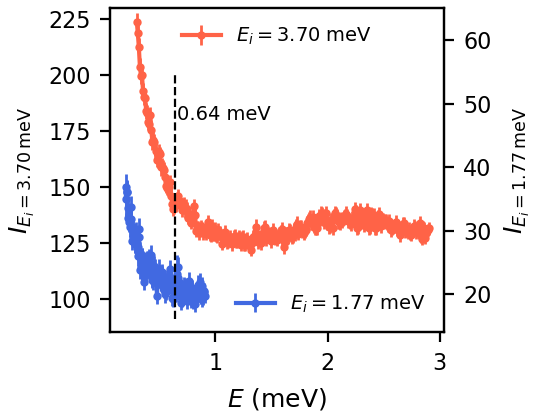

In [14]:
#cut 3.70meV and 1.77 meV 25K
data = np.genfromtxt('CrPymCl2_Ei_3p70meV_25K_cut.mat',skip_header=4)
data2 = np.genfromtxt('CrPymCl2_Ei_1p77meV_25K_cut.mat',skip_header=4)

fig, ax2 = plt.subplots(figsize=(2.7, 2.1),constrained_layout=True)
ax2.errorbar(data[:,0],data[:,1], yerr=data[:,2], marker='o', markersize=2,elinewidth=1,label='$E_i = 3.70$ meV',c='tomato',zorder=5)
ax2.set_xlabel('$E$ (meV)',fontsize=9)
ax2.set_ylabel('$I_{E_i = 3.70 \, \mathrm{meV}}$',fontsize=9)
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylim(85,230)
ax2.text(0.66,180,"0.64 meV", fontsize=7)
ax2.legend(frameon=False, loc=9, fontsize=7)

ax1 = ax2.twinx()
ax1.errorbar(data2[:160,0],data2[:160,1], yerr=data2[:160,2], marker='o', markersize=2,elinewidth=1,label='$E_i = 1.77$ meV',c='royalblue',zorder=5)
ax1.set_ylim(14,65)
ax1.set_xlabel('$E$ (meV)',fontsize=9)
ax1.set_ylabel('$I_{E_i = 1.77 \, \mathrm{meV}}$',fontsize=9)
ax1.tick_params(axis='both', labelsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend(frameon=False, loc=4, fontsize=7)#,bbox_to_anchor=(1, 12))
plt.rcParams['pdf.fonttype'] = 3
ax1.vlines(0.64,16,55,linestyles='dashed',lw=0.8,zorder=10)
#plt.savefig('CrpymCl2_Ei_3p70meV_1p77meV_25K_cut.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


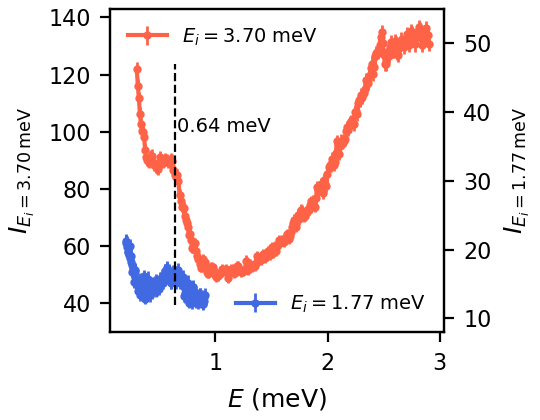

In [15]:
#cut 3.70meV and 1.77 meV 1.7K
data = np.genfromtxt('CrPymCl2_Ei_3p70meV_1p7K_cut.mat',skip_header=4)
data2 = np.genfromtxt('CrPymCl2_Ei_1p77meV_1p7K_cut.mat',skip_header=4)

fig, ax2 = plt.subplots(figsize=(2.7, 2.1),constrained_layout=True)
ax2.errorbar(data[:,0],data[:,1], yerr=data[:,2], marker='o', markersize=2,elinewidth=1,label='$E_i = 3.70$ meV',c='tomato',zorder=5)
ax2.set_xlabel('$E$ (meV)',fontsize=9)
ax2.set_ylabel('$I_{E_i = 3.70 \, \mathrm{meV}}$',fontsize=9)
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylim(30,143)
ax2.text(0.66,100,"0.64 meV", fontsize=7)
ax2.legend(frameon=False, loc=2, fontsize=7)

ax1 = ax2.twinx()
ax1.errorbar(data2[:160,0],data2[:160,1], yerr=data2[:160,2], marker='o', markersize=2,elinewidth=1,label='$E_i = 1.77$ meV',c='royalblue',zorder=5)
ax1.set_xlabel('$E$ (meV)',fontsize=9)
ax1.set_ylabel('$I_{E_i = 1.77 \, \mathrm{meV}}$',fontsize=9)
ax1.tick_params(axis='both', labelsize=8)
ax1.tick_params(axis='both', labelsize=8)
ax1.legend(frameon=False, loc=4, fontsize=7)#,bbox_to_anchor=(1, 12))
plt.rcParams['pdf.fonttype'] = 3
ax1.vlines(0.64,12,47,linestyles='dashed',lw=0.8,zorder=10)
#plt.savefig('CrpymCl2_Ei_3p70meV_1p77meV_1p7K_cut.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


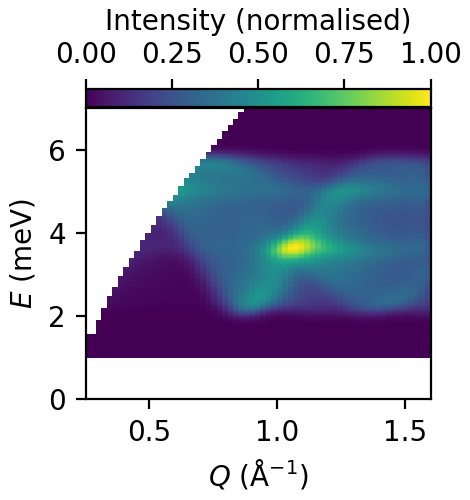

In [16]:
#normalised calculated pattern
fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,cIGrid,cmap=cmap,shading='auto',vmin=0,vmax=1)
plt.colorbar(use_gridspec=False,label='Intensity (normalised)',location="top",pad=-0.04)
plt.xlim(Q_min,Q_max)
plt.ylim(0,7)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize='medium')
plt.ylabel('$E$ (meV)',fontsize='medium')
#plt.savefig('CrpymCl2_heatmap_LET_1p7K_12p14meV_subtraction.png')
plt.show()

<IPython.core.display.Javascript object>


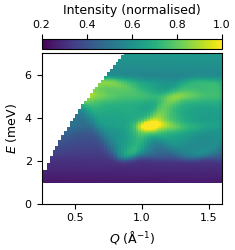

In [20]:
#fitted calculated pattern with background
fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,fIGrid,cmap=cmap,shading='auto',vmin=0.2,vmax=1) 
cbar=plt.colorbar(use_gridspec=False,location="top",pad=-0.02)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(xlabel='Intensity (normalised)',fontsize=9)
plt.xlim(0.25,1.6)
plt.ylim(0,7)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize=9)
plt.ylabel('$E$ (meV)',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams['pdf.fonttype'] = 3
#plt.tight_layout()
#plt.savefig('CrpymCl2_heatmap_calculated.pdf', transparent=True)
plt.show()

<IPython.core.display.Javascript object>


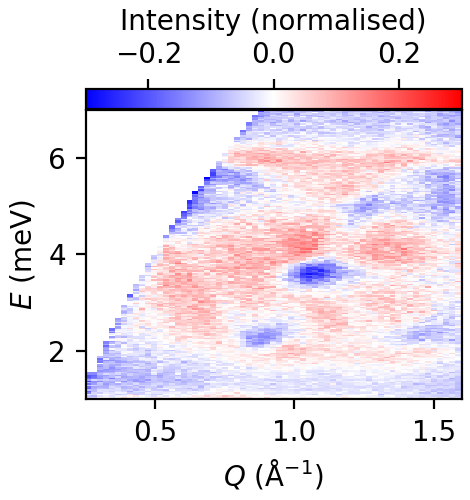

max 0.1802563391994334 min -0.3285330170125821
mean -4.998516404467138e-10 std 0.05801780085128155
CrpymCl2_1.13_-0.1_-0.01_-0.11.dat chi-square 46212.602721720774


In [19]:
#difference plot between raw data and optimum fit
fig, ax2 = plt.subplots(figsize=(2.35, 2.5),constrained_layout=True)
plt.pcolormesh(QGrid,EGrid,sIGrid,cmap=rmap,shading='auto',vmin=-0.3,vmax=0.3)
plt.colorbar(use_gridspec=False,label='Intensity (normalised)',location="top",pad=-0.04)
plt.xlim(Q_min,Q_max)
#plt.ylim(E_min,E_max)
plt.xlabel('$Q$ (Å$^{-1}$)',fontsize='medium')
plt.ylabel('$E$ (meV)',fontsize='medium')
#plt.savefig(fo.name + "_subtraction.pdf")
plt.show()

print('max',np.amax(sIGrid),'min',np.amin(sIGrid))
print('mean',np.mean(sIGrid),'std',np.std(sIGrid))
print(fo.name,'chi-square',np.sum(np.square(sIGrid/eIGrid)),)